# 1. Les packages

In [1]:
# Importer les packages nécessaires
import pandas as pd
import numpy as np
import matplotlib_inline 
import matplotlib.pyplot as plt
import seaborn as sns

# Test de normalité
#import pingouin as pg

# Modèles d'algorithmes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler, OneHotEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, accuracy_score , precision_score, recall_score
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold, RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor,BaggingRegressor,AdaBoostRegressor
#pip install xgboost
from xgboost import XGBRegressor
from sklearn.svm import SVR

sns.set_style("whitegrid")

import warnings
warnings.filterwarnings('ignore')
#return warn(OUTDATED_IGNORE=1)
#pip install outdated
from outdated import warn_if_outdated
warn_if_outdated('my-package-name', '1.2.3')

import time
start_time = time.time()

# 2. Importation des données

In [2]:
# Importer les données
data = pd.read_csv(r"C:\Users\diarr\Projets_Personnels\Analyse_des_ventes_en_supermarché\supermarket_sales - Sheet1.csv")

In [3]:
#pip install jupyterlab_widgets

## 2.1. Exploration des données

* Dans cette partie nous allons faire parcourir nos données; 
* Faire des courtes analyses des données pour en tirer le maximum d'informations pour la suite.

In [4]:
# Afficher les cinq premières lignes
data.head(5)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [5]:
# Forme du jeu de données
data.shape

(1000, 17)

*Nous avons enregistré 1000 ventes c'est à dire chaque ligne représente une vente pendant 3 mois avec différentes caractéristiques (colonnes).*

### Information sur les attributs:
* Identifiant de la facture : Numéro d'identification de la facture du bordereau de vente généré par ordinateur
* Succursale : Succursale du supercentre (3 succursales sont disponibles identifiées par A, B et C).
* Ville : Localisation des supercentres
* Type de client : Type de clients, enregistrés par Membres pour les clients utilisant la carte de membre et Normal pour ceux sans carte de membre.
* Sexe : Sexe type de client
* Ligne de produits : Groupes généraux de catégorisation des articles - Accessoires électroniques, Accessoires de mode, Aliments et boissons, Santé et beauté, Maison et style de vie, Sports et voyages
* Prix unitaire : Prix de chaque produit en $
* Quantité : Nombre de produits achetés par client
* Taxe : 5% de taxe pour l'achat du client
* Total : Prix total TTC
* Date : Date d'achat (Record disponible de janvier 2019 à mars 2019)
* Heure : Heure d'achat (10h à 21h)
* Paiement : Paiement utilisé par le client pour l'achat ( 3 méthodes sont disponibles – espèces, carte de crédit et portefeuille électronique)
* COGS : coût des marchandises vendues
* Pourcentage de marge brute : pourcentage de marge brute
* Revenu brut : revenu brut
* Note : note de stratification des clients sur leur expérience d'achat globale (sur une échelle de 1 à 10)

In [6]:
# Pourcentages des valeurs nulls
pourcent_valeur_null = round((data.isnull().sum()/data.shape[0]*100),2).sort_values(ascending = False)
pourcent_valeur_null

Invoice ID                 0.0
Total                      0.0
gross income               0.0
gross margin percentage    0.0
cogs                       0.0
Payment                    0.0
Time                       0.0
Date                       0.0
Tax 5%                     0.0
Branch                     0.0
Quantity                   0.0
Unit price                 0.0
Product line               0.0
Gender                     0.0
Customer type              0.0
City                       0.0
Rating                     0.0
dtype: float64

In [7]:
# somme des valeurs nulls
valeur_null = data.isnull().sum().sort_values(ascending=False)
valeur_null

Invoice ID                 0
Total                      0
gross income               0
gross margin percentage    0
cogs                       0
Payment                    0
Time                       0
Date                       0
Tax 5%                     0
Branch                     0
Quantity                   0
Unit price                 0
Product line               0
Gender                     0
Customer type              0
City                       0
Rating                     0
dtype: int64

*Nous n'avons pas de valeurs manquantes.*

In [8]:
# Vérification des doublons
print("Doublon par numéro d'identification:" ,(data[data.duplicated(["Invoice ID"])].shape))

# Vérification des doublons
print("Doublon total:" ,(data[data.duplicated()].shape))

Doublon par numéro d'identification: (0, 17)
Doublon total: (0, 17)


*Absence de doublon.*

In [9]:
# Typage des données
info_data = data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

* Nous voyons qu'il y'a des variables qui ne sont pas au bon format de données, dans ce cas nous allons essayer de les convertir au bon format.

In [10]:
# Convertir au bon format
data["Date"] = pd.to_datetime(data["Date"], errors = 'coerce')

# vérification après convertion
print("La colonne Date est de type:", data["Date"].dtypes)

La colonne Date est de type: datetime64[ns]


* Après avoir converti au bon format , nous pouvons créer de nouvelles colonnes à partir de la colonne "Date" pour faciliter la manipulation.

In [11]:
# Création de nouvelles colonnes
# Colonne année
data["Year"] = data["Date"].dt.year

# Colonne mois
data["Month"] = data["Date"].dt.month

# Colonne jour du mois
data["Day"] = data["Date"].dt.day

# Convertion
data['Time'] = pd.to_datetime(data['Time'])
data['Hour'] = data['Time'].dt.hour    

# vérification après convertion
print("La colonne Hour est de type:", data["Hour"].dtypes)

La colonne Hour est de type: int64


In [12]:
# Afficher les cinq premières lignes après création de nouvelles colonnes.
data.head(2)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,...,Time,Payment,cogs,gross margin percentage,gross income,Rating,Year,Month,Day,Hour
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,...,2024-04-09 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,2019,1,5,13
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,...,2024-04-09 10:29:00,Cash,76.40,4.761905,3.8200,9.6,2019,3,8,10


In [13]:
# Typage des données
info_data = data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   datetime64[ns]
 12  Payment                  1000 non-n

In [14]:
# Statistiques descriptives avec toutes les variables
statistique = data.describe().T
statistique

,count,mean,std,min,25%,50%,75%,max
Unit price,1000.0,55.672130,26.494628,10.080000,32.875000,55.230000,77.935000,99.960000
Quantity,1000.0,5.510000,2.923431,1.000000,3.000000,5.000000,8.000000,10.000000
Tax 5%,1000.0,15.379369,11.708825,0.508500,5.924875,12.088000,22.445250,49.650000
Total,1000.0,322.966749,245.885335,10.678500,124.422375,253.848000,471.350250,1042.650000
cogs,1000.0,307.587380,234.176510,10.170000,118.497500,241.760000,448.905000,993.000000
gross margin percentage,1000.0,4.761905,0.000000,4.761905,4.761905,4.761905,4.761905,4.761905
gross income,1000.0,15.379369,11.708825,0.508500,5.924875,12.088000,22.445250,49.650000
Rating,1000.0,6.972700,1.718580,4.000000,5.500000,7.000000,8.500000,10.000000
Year,1000.0,2019.000000,0.000000,2019.000000,2019.000000,2019.000000,2019.000000,2019.000000
Month,1000.0,1.993000,0.835254,1.000000,1.000000,2.000000,3.000000,3.000000


* La génération de statistiques récapitulatives est un moyen rapide de nous aider à déterminer si l'ensemble de données comporte ou non des valeurs aberrantes. 
* Nous pouvons aussi faire des visualisations (les histogrammes et boites à moustaches) pour voir plus les valeurs aberrantes.

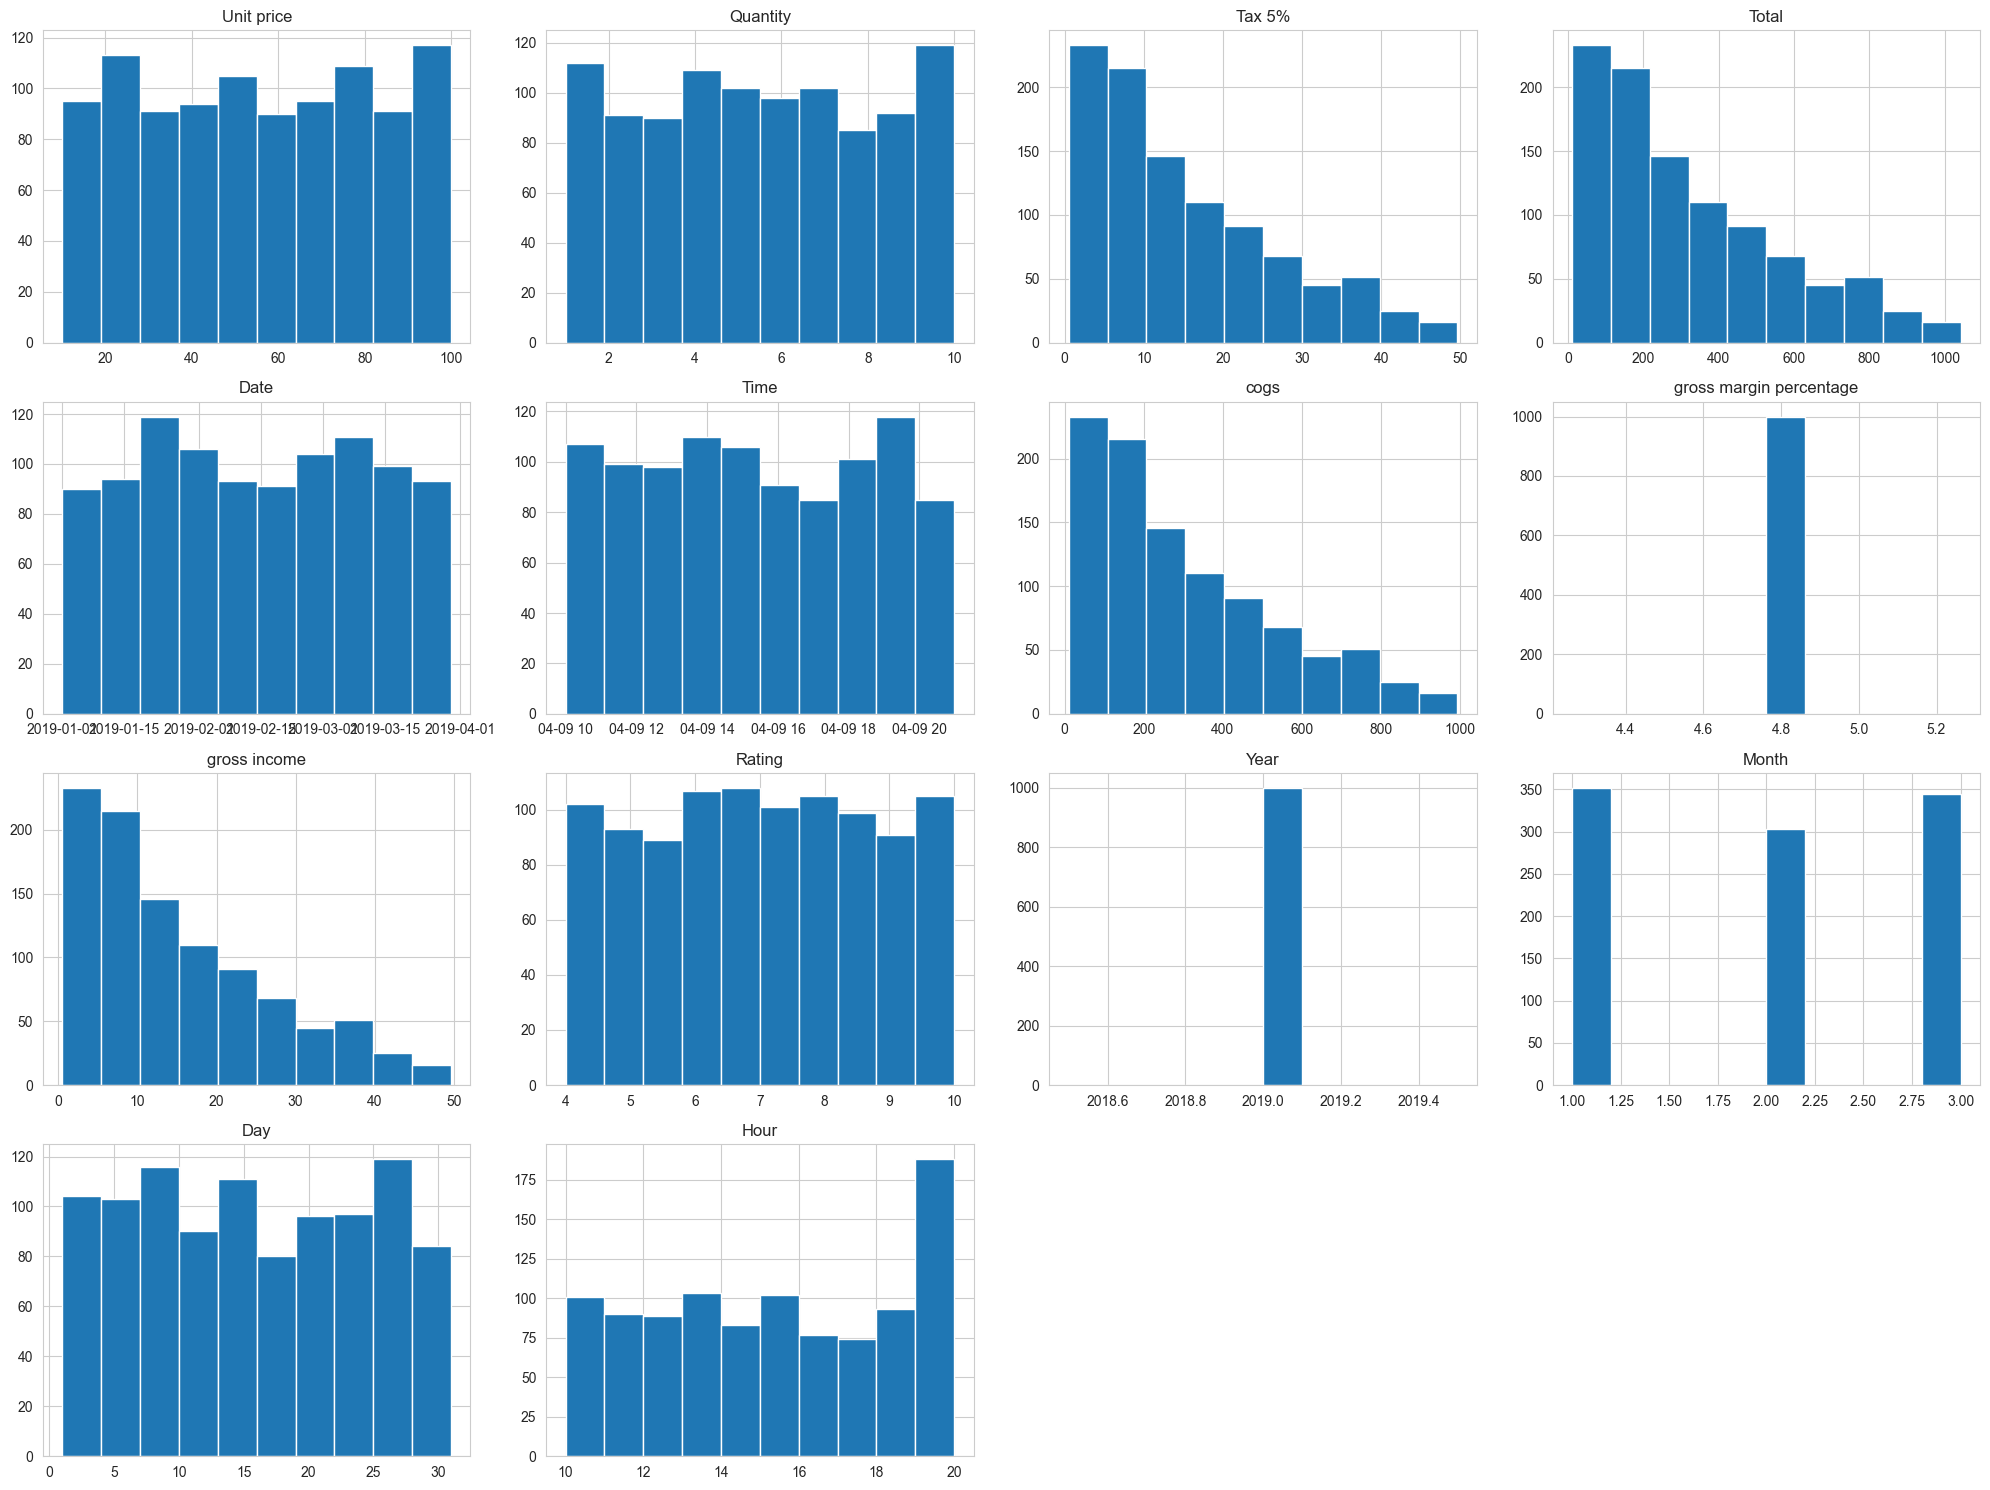

In [15]:
# Visualisation
data.hist(figsize=(20,15))
plt.show
plt.tight_layout()

* Nous voyons que la distribution est assymétrique c'est à dire qu'ils ne suivent pas la loi normal et pour en être sûr, nous allons réaliser un test de normalité pour voir si réellement les variables suivent une distribution normale.

In [16]:
# test de normalité avec la librairie pingouin
#pg.normality(data, method ='normaltest')

In [17]:
# Séparation des variables numériques et catégorielles
num_columns = data.select_dtypes(include=["int64","float"])
cat_columns = data.select_dtypes("object")

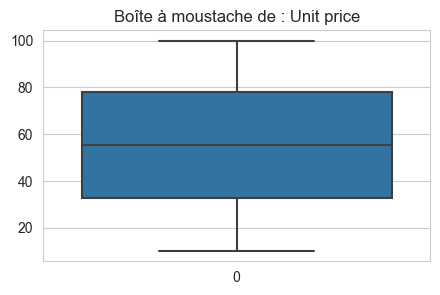

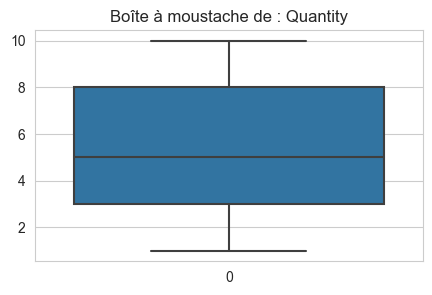

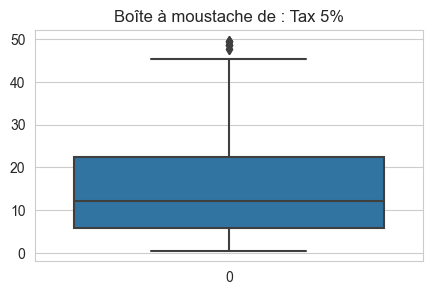

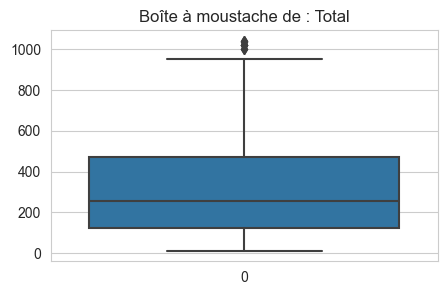

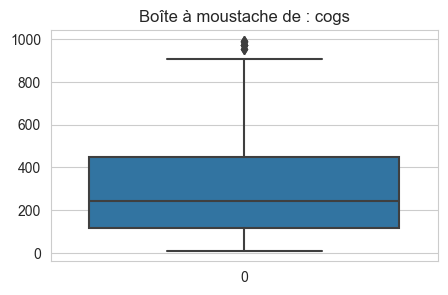

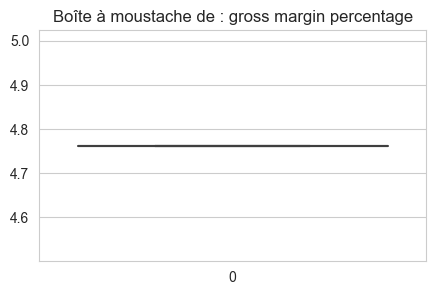

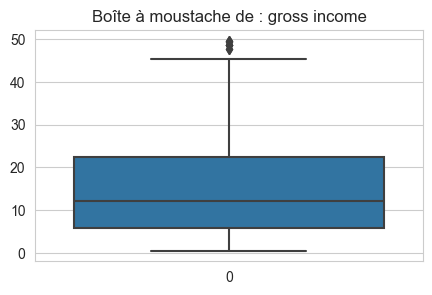

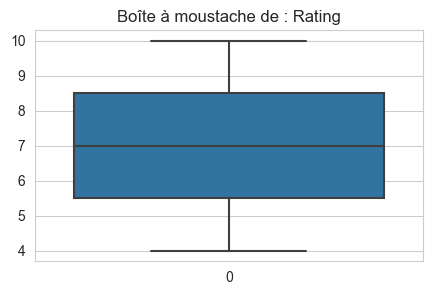

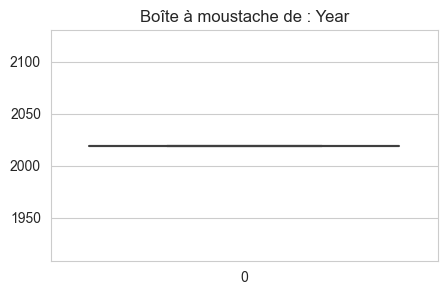

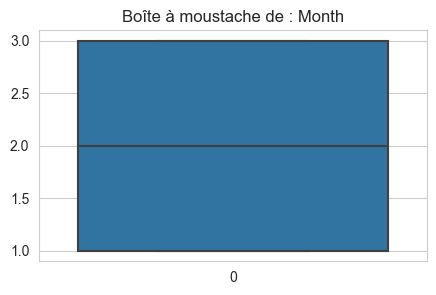

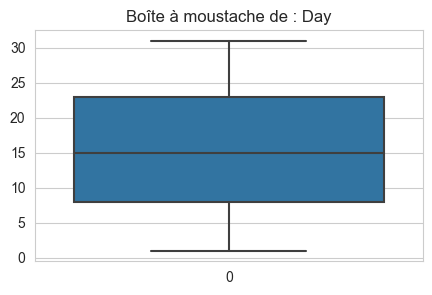

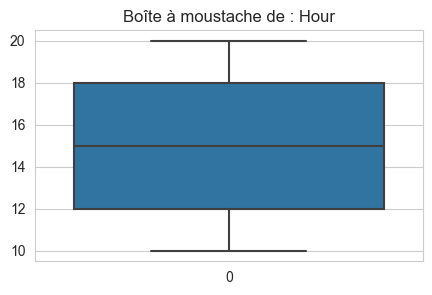

In [18]:
# boites à moustache pour afficher les outliers
for col in num_columns.columns:
    #print(col)
    plt.figure(figsize=(5,3)) 
    sns.boxplot(num_columns[col], showfliers = True)
    plt.title('Boîte à moustache de : ' + str(col))

* Après visualisation, nous observons sur certaines variables la présence de valeurs abérrantes.
* Pour celà nous pouvons générer une fonction qui permet de les détecter ainsi pour pouvoir les traiter pour la suite de notre analyse.

*Pour rappel nous avons l'entreprise qui a enregistré les ventes pendant trois mois dans trois différentes succursales, nous allons voir leur répartition.*

In [19]:
# Le nombre de succursales
data["Branch"].value_counts()

A    340
B    332
C    328
Name: Branch, dtype: int64

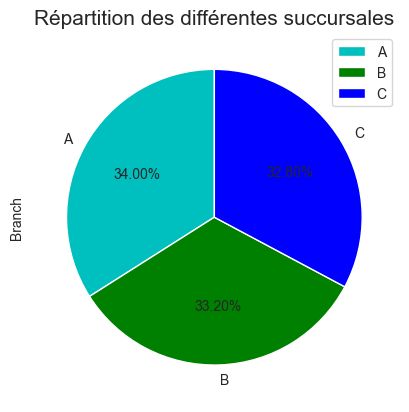

In [20]:
# visualisation des différentes succursales
# sns.countplot(x = data["Branch"])
data["Branch"].value_counts().plot(kind = "pie",autopct='%1.2f%%', 
                                               labels = ["A","B", "C"],colors = ["c", "g", "b"], startangle=90)
plt.title("Répartition des différentes succursales", fontsize=15)
plt.legend()
plt.show()

* Nous avons 34% pour le succursale A, 33,20% pour le succursale B et 32,80% pour le succursale C.

In [21]:
#sta_descrip_succ = data.groupby("Branch").describe().T
#sta_descrip_succ

## 2.2. Analyse des données

* Dans cette partie nous allons faire une courte analyse pour en savoir plus sur nos données c'est à dire s'il existe des relations entre nos variables quantitatives.

*Nous allons commencer à faire une analyse bivariée c'est à dire voir s'il exite des corrélations linéaire entre les différentes variables quantitatives,
Si on observe des variables qui sont fortement corrélées entres elles, donc nous allons supprimer l'une et garder l'autre afin d'éviter le problème de multicolinéarité au niveau des modèles.
Pour celà nous allons les visualiser avec la matrix de corrélation sans valeurs manquantes.*

<AxesSubplot: >

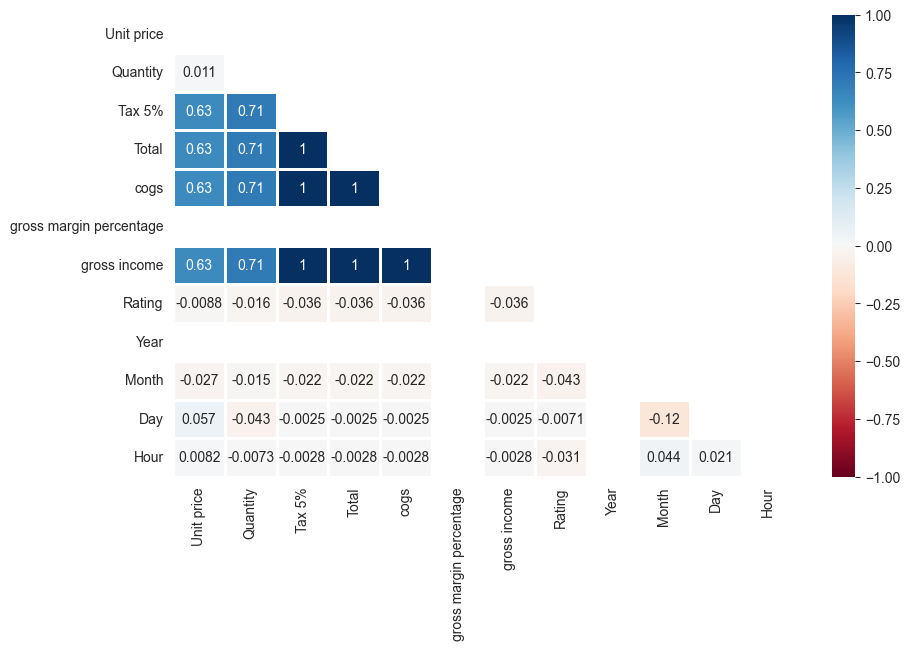

In [22]:
# Visualisation de la matrix de corrélation
plt.figure(figsize = (10, 6))
mask = np.triu(np.ones_like(data.corr(), dtype=bool))
sns.heatmap(data.corr(), mask = mask, cmap='RdBu', vmin = -1, vmax = 1, annot = True, linewidths = 2)

* Nous remarquons une forte corrélation entre le taxe pour l'achat d'un client, prix total TTC, prix unitaire de chaque produit et le coût des marchandises vendues en fonction de la quantité (nombre de produit par client) et le prix unitaire.
* Pour éviter la multicolinéarité de ces variables nous allons les supprimer car ils pourront fausser la prédiction.

*Maintenant nous voir le chiffre d'affaires mensuel pendant les trois mois de ventes*

In [23]:
# calculer le chiffre d'affaires par mois
CA_mensuel = data.groupby(["Month"])["Total"].sum().sort_values(ascending = False).reset_index()
CA_mensuel

,Month,Total
0,1,116291.868
1,3,109455.507
2,2,97219.374


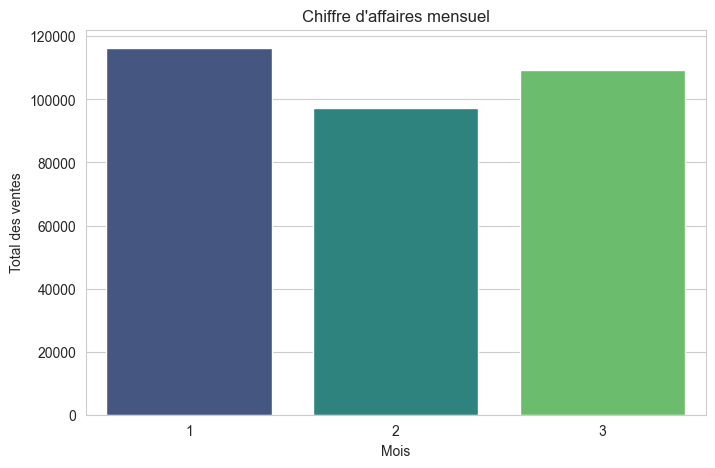

In [24]:
# Visualisation
plt.figure(figsize=(8, 5))
sns.barplot(x = CA_mensuel["Month"], y = CA_mensuel["Total"], data = CA_mensuel, palette = "viridis")
plt.title("Chiffre d'affaires mensuel")
plt.ylabel("Total des ventes")
plt.xlabel("Mois")
plt.show()

* Le mois de janvier est le mois où on obtient le plus de ventes par rapport au mois de février.

In [25]:
# Total des ventes par succuesales
TV_succ = data.groupby(["Branch"])["Total"].sum().sort_values(ascending=False).reset_index()
TV_succ

,Branch,Total
0,C,110568.7065
1,A,106200.3705
2,B,106197.6720


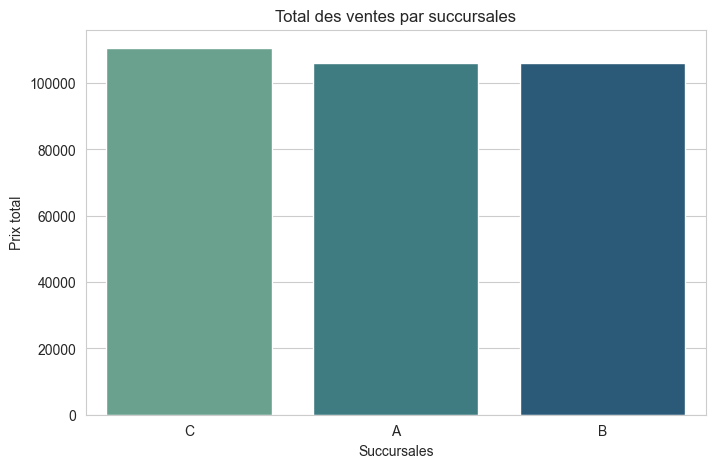

In [26]:
# Visualisation
plt.figure(figsize=(8, 5))
sns.barplot(x = TV_succ["Branch"], y = TV_succ["Total"], data = TV_succ, palette = "crest")
plt.title("Total des ventes par succursales")
plt.ylabel("Prix total")
plt.xlabel("Succursales")
#plt.legend()
plt.show()

In [27]:
# Les catégories de produit
data["Product line"].value_counts()

Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: Product line, dtype: int64

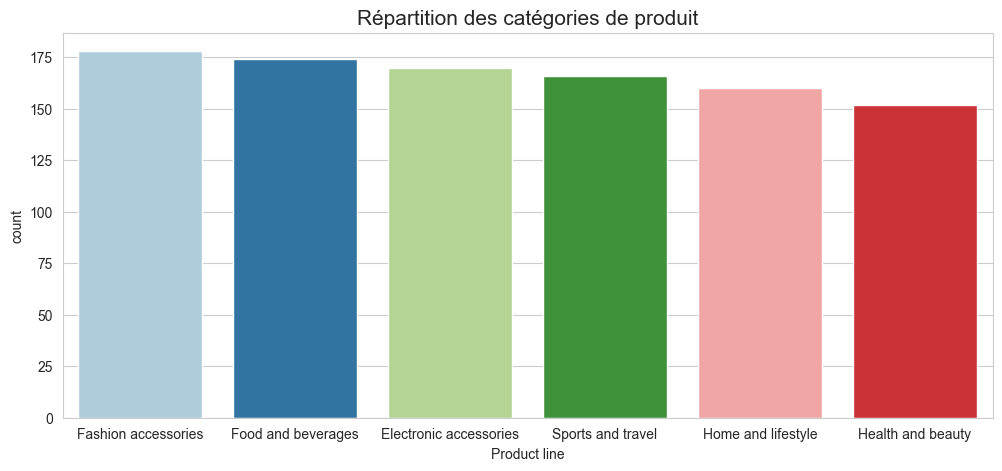

In [28]:
# visualisation des différentes catégories de produits
plt.figure(figsize=(12, 5))
sns.countplot(x = data["Product line"], order = data["Product line"].value_counts(ascending=False).index , palette = "Paired")
plt.title("Répartition des catégories de produit", fontsize=15)
plt.show()

* Nous observons une légère diffrérence du nombre des différents catégories de produits.

In [29]:
# Le genre de nos clients
data["Gender"].value_counts()

Female    501
Male      499
Name: Gender, dtype: int64

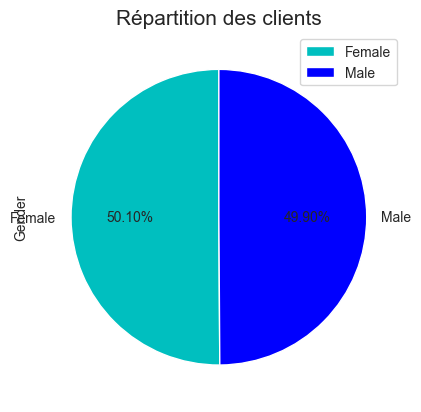

In [30]:
# visualisation du genre
data["Gender"].value_counts().plot(kind = "pie",autopct='%1.2f%%', 
                                               labels = ["Female","Male"],colors = ["c", "b"], startangle=90)
plt.title("Répartition des clients", fontsize=15)
plt.legend()
plt.show()

* Nous avons 50% de nos clients qui sont de sexe féminin et 49% de sex masculin.
* Ils sont pratiquement égales.

In [31]:
# Les types de clients
data["Customer type"].value_counts()

Member    501
Normal    499
Name: Customer type, dtype: int64

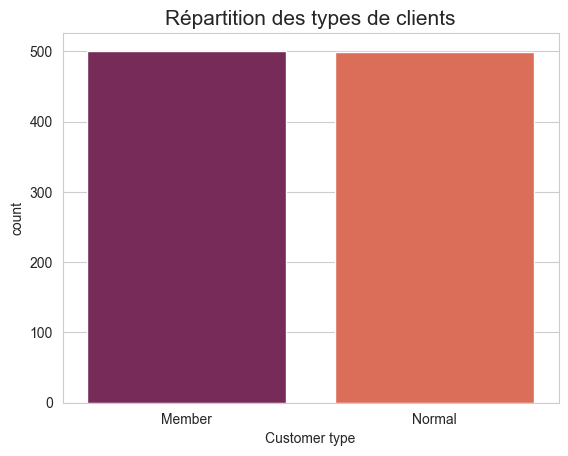

In [32]:
# visualisation des types de clients
sns.countplot(x = data["Customer type"], order = data["Customer type"].value_counts(ascending=False).index , palette = "rocket")
plt.title("Répartition des types de clients", fontsize=15)
plt.show()

* Les proportions des types de clients sont pratiquement égales.

In [33]:
# Les valeurs uniques 
data["Payment"].unique()

array(['Ewallet', 'Cash', 'Credit card'], dtype=object)

In [34]:
# Le nombre pour chaque type de payement
data["Payment"].value_counts()

Ewallet        345
Cash           344
Credit card    311
Name: Payment, dtype: int64

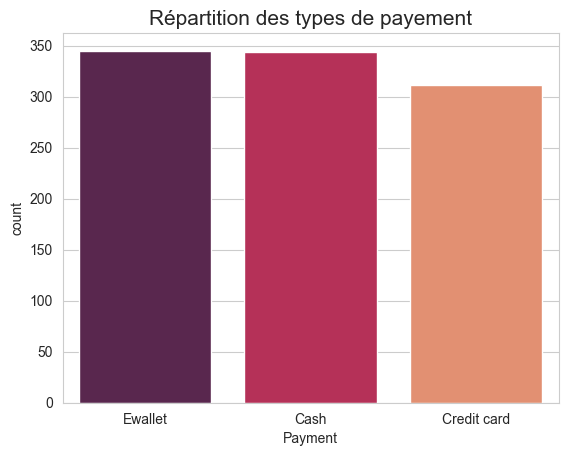

In [35]:
# visualisation des types de payement
sns.countplot(x = data["Payment"], order = data["Payment"].value_counts(ascending=False).index , palette = "rocket")
plt.title("Répartition des types de payement", fontsize=15)
plt.show()

* Les payements par portefeuille électronique sont nombreux par rapport aux payement par carte bancaire.

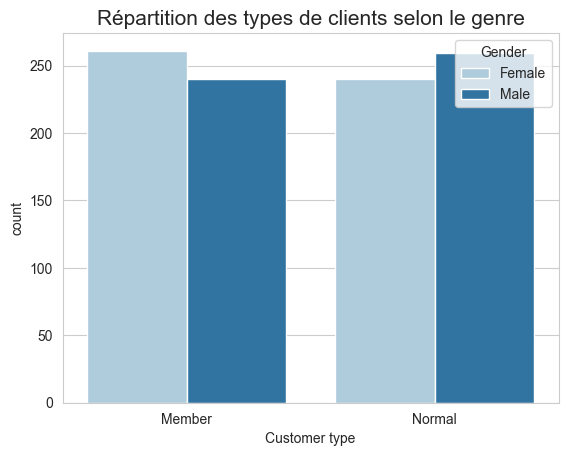

In [36]:
# visualisation des types de clients selon le genre
sns.countplot(x = data["Customer type"], hue = "Gender", data = data, palette = "Paired")
plt.title("Répartition des types de clients selon le genre", fontsize=15)
plt.show()

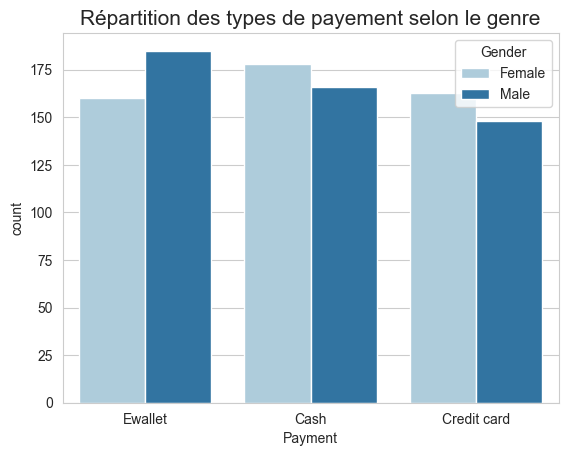

In [37]:
# visualisation des types de payement selon le genre
sns.countplot(x = data["Payment"], hue = "Gender", data = data, palette = "Paired")
plt.title("Répartition des types de payement selon le genre", fontsize=15)
plt.show()

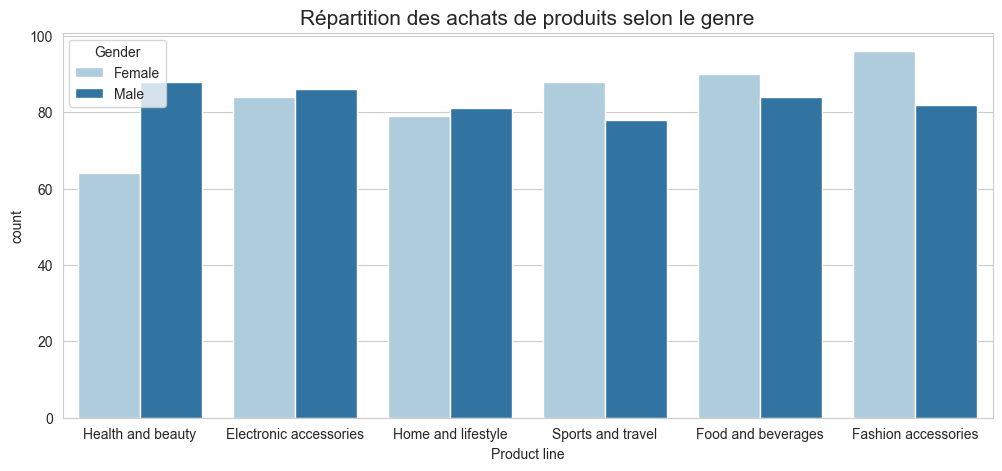

In [38]:
# visualisation des achats de produits selon le genre
plt.figure(figsize=(12, 5))
sns.countplot(x = data["Product line"], hue = "Gender", data = data, palette = "Paired")
plt.title("Répartition des achats de produits selon le genre", fontsize=15)
plt.show()

In [39]:
# Evolution de la quantité des ventes par heure
QV_heure = data.groupby(["Hour"])["Quantity"].sum().sort_values(ascending = False).reset_index()
QV_heure

,Hour,Quantity
0,19,649
1,13,585
2,15,530
3,10,525
4,11,513
5,12,501
6,14,495
7,18,475
8,16,420
9,17,415


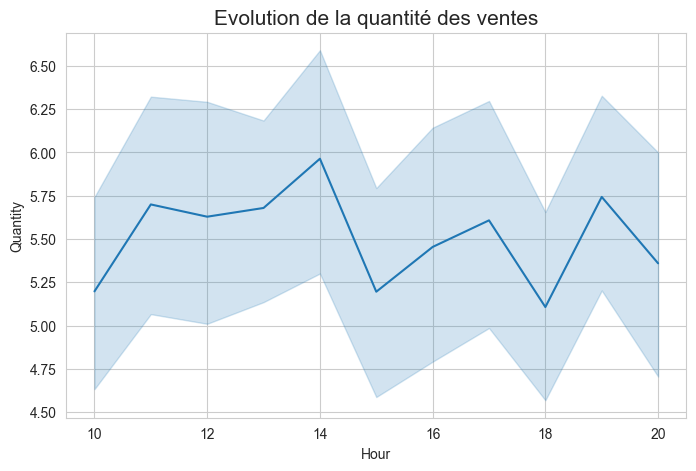

In [40]:
# Visualisation de la quantité des ventes par heures 
plt.figure(figsize=(8, 5))
sns.lineplot(x = data["Hour"],  y = data['Quantity'], data = data)
plt.title("Evolution de la quantité des ventes", fontsize = 15)
plt.show()

In [41]:
# Totalité des ventes par  heure
TV_heure = data.groupby(["Hour"])["Total"].sum().sort_values(ascending = False).reset_index()
TV_heure

,Hour,Total
0,19,39699.5130
1,13,34723.2270
2,10,31421.4810
3,15,31179.5085
4,14,30828.3990
5,11,30377.3295
6,12,26065.8825
7,18,26030.3400
8,16,25226.3235
9,17,24445.2180


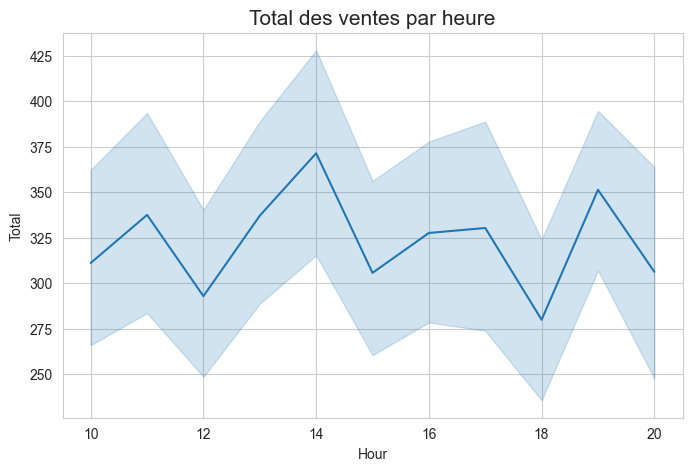

In [42]:
# Visualisation de la quantité des ventes par heures 
plt.figure(figsize=(8, 5))
sns.lineplot(x = data["Hour"],  y = data['Total'], data = data)
plt.title("Total des ventes par heure", fontsize = 15)
plt.show()

* Nous observons que les ventes augmentent de 12h à 14h puis de 18h à 20h ce qui est normal parcequ'il s'agit de l'heure du déjeuner et l'heure du dîner.

In [43]:
# Les valeurs uniques
data["City"].unique()

array(['Yangon', 'Naypyitaw', 'Mandalay'], dtype=object)

In [44]:
# Evolution de la quantité des ventes par par heure
QTV_city = data.groupby(["City"])["Quantity"].sum().sort_values(ascending = False).reset_index()
QTV_city

,City,Quantity
0,Yangon,1859
1,Naypyitaw,1831
2,Mandalay,1820


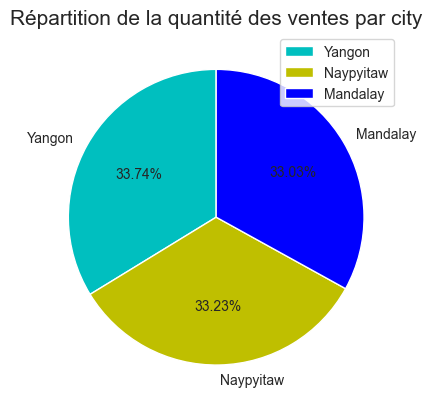

In [45]:
# visualisation des différentes succursales
#plt.figure(figsize=(8,5))
plt.pie(data.groupby(["City"])["Quantity"].sum().sort_values(ascending = False), autopct='%1.2f%%', 
                                               labels = ["Yangon","Naypyitaw", "Mandalay"],colors = ["c", "y", "b"], startangle=90)
plt.title("Répartition de la quantité des ventes par city", fontsize=15)
plt.legend()
plt.show()

In [46]:
# Evolution de la quantité des ventes par par heure
TV_city = data.groupby(["City"])["Total"].sum().sort_values(ascending = False).reset_index()
TV_city

,City,Total
0,Naypyitaw,110568.7065
1,Yangon,106200.3705
2,Mandalay,106197.6720


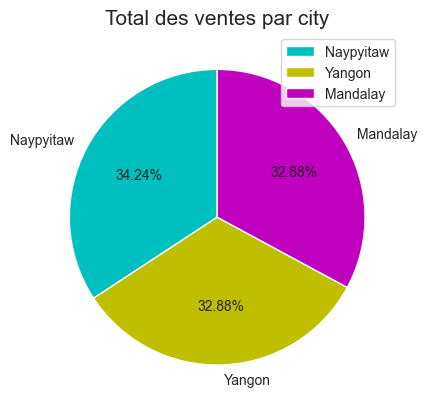

In [47]:
# visualisation des différentes succursales
#plt.figure(figsize=(8,5))
plt.pie(data.groupby(["City"])["Total"].sum().sort_values(ascending = False), autopct='%1.2f%%', 
                                               labels = ["Naypyitaw", "Yangon", "Mandalay"],colors = ["c", "y", "m"], startangle=90)
plt.title("Total des ventes par city", fontsize=15)
plt.legend()
plt.show()

* Le Total ainsi que la quantité des ventes par villes sont pratiquements égales.

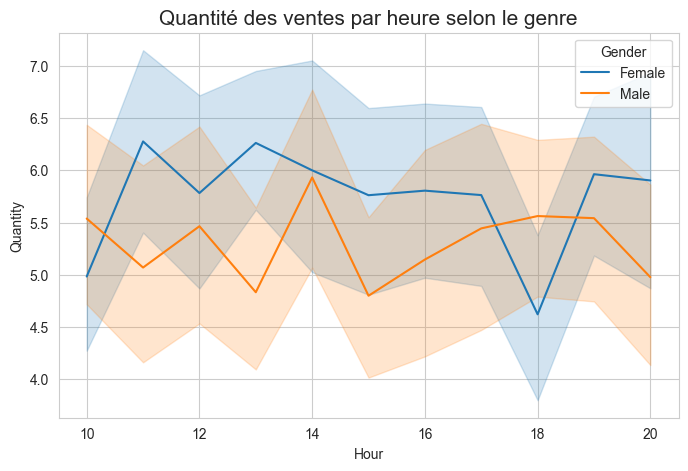

In [48]:
# Visualisation de la quantité des ventes par heures 
plt.figure(figsize=(8, 5))
sns.lineplot(x = data["Hour"],  y = data['Quantity'], hue = "Gender", data = data)
plt.title("Quantité des ventes par heure selon le genre", fontsize = 15)
plt.show()

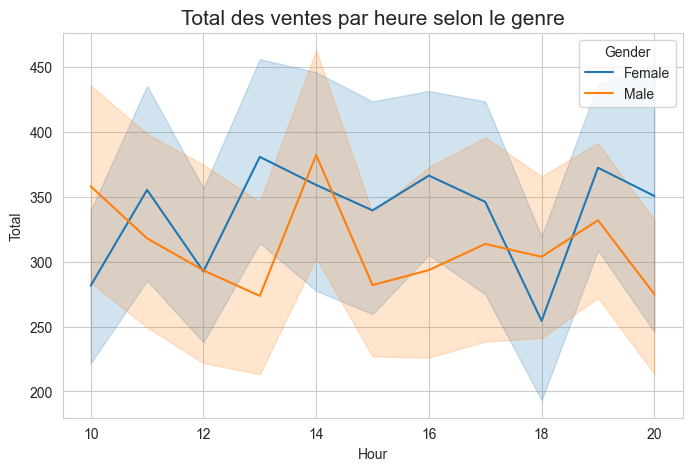

In [49]:
# Visualisation de la quantité des ventes par heures 
plt.figure(figsize=(8, 5))
sns.lineplot(x = data["Hour"],  y = data['Total'], hue = "Gender", data = data)
plt.title("Total des ventes par heure selon le genre", fontsize = 15)
plt.show()

In [50]:
# Totalité des ventes par heure et par ville
TVC_heure = data.groupby(["City", "Hour"])["Total"].sum().sort_values(ascending = False).reset_index()
TVC_heure

,City,Hour,Total
0,Mandalay,19,16262.4525
1,Naypyitaw,19,13106.8035
2,Naypyitaw,13,13007.0640
3,Mandalay,14,11694.5640
4,Yangon,11,11349.8910
5,Naypyitaw,10,11347.2240
6,Yangon,15,11273.7030
7,Mandalay,13,11272.4115
8,Yangon,10,11208.4140
9,Yangon,16,10869.7365


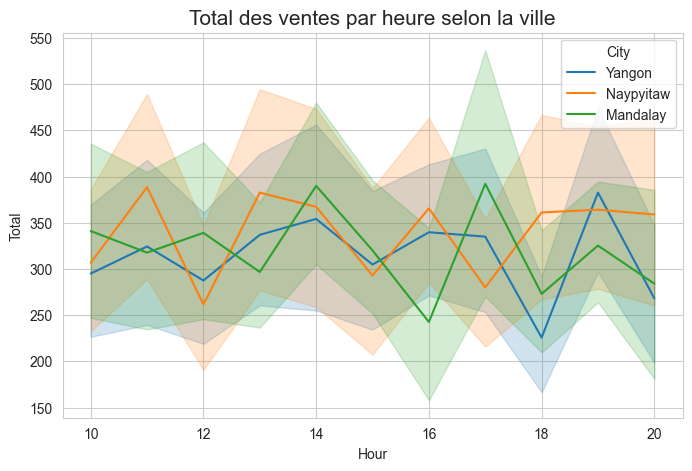

In [51]:
# Visualisation de la quantité des ventes par heures 
plt.figure(figsize=(8, 5))
sns.lineplot(x = data["Hour"],  y = data['Total'], hue = "City", data = data)
plt.title("Total des ventes par heure selon la ville", fontsize = 15)
plt.show()

In [52]:
# les valeurs uniques
data["Rating"].unique()

array([ 9.1,  9.6,  7.4,  8.4,  5.3,  4.1,  5.8,  8. ,  7.2,  5.9,  4.5,
        6.8,  7.1,  8.2,  5.7,  4.6,  6.9,  8.6,  4.4,  4.8,  5.1,  9.9,
        6. ,  8.5,  6.7,  7.7,  7.5,  7. ,  4.7,  7.6,  7.9,  6.3,  5.6,
        9.5,  8.1,  6.5,  6.1,  6.6,  5.4,  9.3, 10. ,  6.4,  4.3,  4. ,
        8.7,  9.4,  5.5,  8.3,  7.3,  4.9,  4.2,  9.2,  7.8,  5.2,  9. ,
        8.8,  6.2,  9.8,  9.7,  5. ,  8.9])

In [53]:
# La somme des valeurs
data["Rating"].nunique()

61

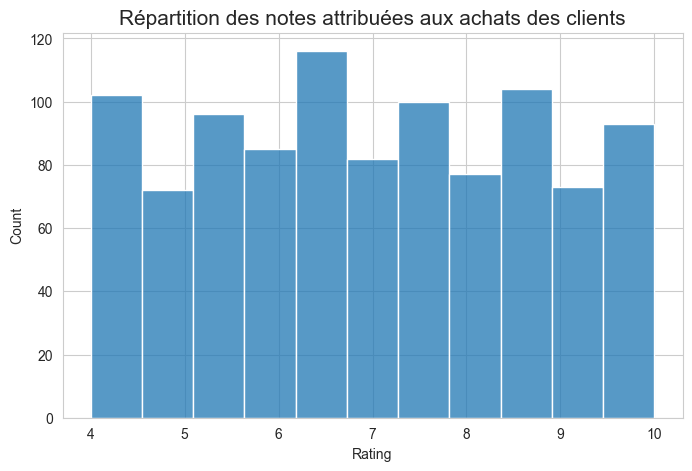

In [54]:
# Les notes par client
plt.figure(figsize=(8, 5))
sns.histplot(x = data["Rating"], data = data)
plt.title("Répartition des notes attribuées aux achats des clients", fontsize = 15)
plt.show()

* Les notes varient de 4 à 10, la plus part des clients donnent la note de 6,5 comme note.

In [55]:
# La moyenne des notes par heure 
AVG_heure = data.groupby(["Hour"])["Rating"].mean().sort_values(ascending = False).reset_index()
AVG_heure

,Hour,Rating
0,12,7.300000
1,18,7.187097
2,10,7.098020
3,13,7.030097
4,20,6.977333
5,17,6.939189
6,14,6.934940
7,15,6.876471
8,16,6.859740
9,11,6.806667


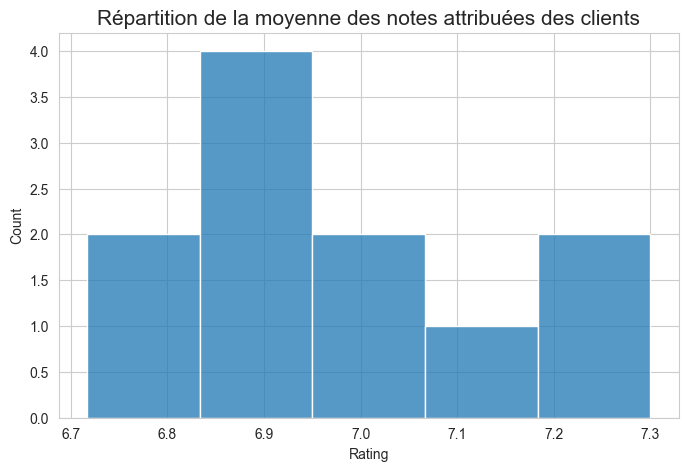

In [56]:
# Les notes par client
plt.figure(figsize=(8, 5))
sns.histplot(x = AVG_heure["Rating"], data = data)
plt.title("Répartition de la moyenne des notes attribuées des clients", fontsize = 15)
plt.show()

In [57]:
"""# Energie utilisée par type de propriétés
plt.rcParams.update({ "font.size" : 13})
plt.figure(figsize=(10, 12))
sns.barplot(x="SiteEnergyUse(kBtu)", y="PrimaryPropertyType", hue='DataYear', 
    data=df.groupby(['DataYear', 'PrimaryPropertyType'])['SiteEnergyUse(kBtu)'].max().reset_index())
plt.title("Energie utilisée par type de propriétés")
plt.show()"""

'# Energie utilisée par type de propriétés\nplt.rcParams.update({ "font.size" : 13})\nplt.figure(figsize=(10, 12))\nsns.barplot(x="SiteEnergyUse(kBtu)", y="PrimaryPropertyType", hue=\'DataYear\', \n    data=df.groupby([\'DataYear\', \'PrimaryPropertyType\'])[\'SiteEnergyUse(kBtu)\'].max().reset_index())\nplt.title("Energie utilisée par type de propriétés")\nplt.show()'

*Après ces différentes analyses sur les données, nous allons passer à la modélisation de nos données c'est à dire la partie prédiction.*

# 3. Modélisation

In [58]:
# Faire une copy
Data = data.copy()
# Afficher la table
Data.head(2)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,...,Time,Payment,cogs,gross margin percentage,gross income,Rating,Year,Month,Day,Hour
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,...,2024-04-09 13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,2019,1,5,13
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,...,2024-04-09 10:29:00,Cash,76.40,4.761905,3.8200,9.6,2019,3,8,10


## 3.1. Préparation des données

* Nous allons supprimer certaines colonnes qui ne nous semblent pas pertinent pour faire la prédiction Total des ventes.
* Les algorithmes de Machine Learning ne fonctionnent pas avec des variables qualitatives (catégorielles) mais plutôt avec des variables quantitatives (numériques);
* Pour celà nous allons procéder à une transformation des données c'est à dire remplacer ces variables qualitatives en variables quantitatives. 

In [59]:
# Afficher les différentes colonnes
Data.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating', 'Year', 'Month', 'Day', 'Hour'],
      dtype='object')

In [60]:
# Suppression des colonnes
New_data = Data.drop(columns = ['Invoice ID', 'Tax 5%', 'cogs', 'gross margin percentage', 'gross income',
                               'Rating', 'Year', 'Time', 'Date'], axis = 1 )

In [61]:
# Affichage après suppression de certaines colonnes
New_data.head(2)

,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Total,Payment,Month,Day,Hour
0,A,Yangon,Member,Female,Health and beauty,74.69,7,548.9715,Ewallet,1,5,13
1,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,80.2200,Cash,3,8,10


In [62]:
# Features = variables indépendantes
X = New_data.drop(columns = ["Total"], axis = 1)

# Variable cible = variable dépendante
y = New_data["Total"]

# Afficher les données
print(X.shape)
print(y.shape)

(1000, 11)
(1000,)


* Puisque les algorithmes de Machine Learning ne fonctionne pas avec les variables catégorielles, nous allons procéder à leur conversion avec différentes étapes.

In [63]:
# Encodage des données (variables catégorielles)
# Sélectionner les variables catégorielles sous forme de liste
#cat_var = X.select_dtypes(include=["object"]).columns.to_list()
cat_var = X.select_dtypes(include=["object"])
cat_var.head(2)

,Branch,City,Customer type,Gender,Product line,Payment
0,A,Yangon,Member,Female,Health and beauty,Ewallet
1,C,Naypyitaw,Normal,Female,Electronic accessories,Cash


In [64]:
# Sélectionner les variables numériques sous forme de liste
num_var = X.select_dtypes(include=["int64", "float"])
num_var.head(2)

,Unit price,Quantity,Month,Day,Hour
0,74.69,7,1,5,13
1,15.28,5,3,8,10


In [65]:
# Application de la fonction One Hot Encoding
# X_OHE = pd.get_dummies(X[cat_var], drop_first = True)
X_OHE = pd.get_dummies(cat_var, drop_first= True)
X_OHE.head(2)

,Branch_B,Branch_C,City_Naypyitaw,City_Yangon,Customer type_Normal,Gender_Male,Product line_Fashion accessories,Product line_Food and beverages,Product line_Health and beauty,Product line_Home and lifestyle,Product line_Sports and travel,Payment_Credit card,Payment_Ewallet
0,0,0,0,1,0,0,0,0,1,0,0,0,1
1,0,1,1,0,1,0,0,0,0,0,0,0,0


In [66]:
# Le nombre de lignes et colonnes après application de la fonction
print(X_OHE.shape)

(1000, 13)


In [67]:
# Fusion des deux data(Concaténation)
#new_data_OHE = pd.concat([X, X_OHE], axis = 1)
X_final = pd.concat([num_var, X_OHE], axis = 1)
X_final.head(2)

,Unit price,Quantity,Month,Day,Hour,Branch_B,Branch_C,City_Naypyitaw,City_Yangon,Customer type_Normal,Gender_Male,Product line_Fashion accessories,Product line_Food and beverages,Product line_Health and beauty,Product line_Home and lifestyle,Product line_Sports and travel,Payment_Credit card,Payment_Ewallet
0,74.69,7,1,5,13,0,0,0,1,0,0,0,0,1,0,0,0,1
1,15.28,5,3,8,10,0,1,1,0,1,0,0,0,0,0,0,0,0


* Après cette étape de conversion des variables catégorielles, nous allons passer maintenant à la séparation des données d'entrainement et test pour pouvoir faire la prédiction sur le total des ventes.
* Ensuite faire de la Standardisation c'est à dire toutes les données doivent être comprises entre 0 et 1 .

In [68]:
# Données d'entrainement et de test
seed = 42
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size = 0.20, random_state= seed)
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (800, 18)
X_test shape: (200, 18)
y_train shape: (800,)
y_test shape: (200,)


In [69]:
# Standardisation
scaler = StandardScaler()
# Instanciation
scaler.fit(X_train)
# Appliquer 
X1_train = pd.DataFrame(scaler.transform(X_train), columns = X_final.columns)
X1_test = pd.DataFrame(scaler.transform(X_test), columns = X_final.columns)

* Nous allons passer à la modélisation avec l'essai de plusieurs algorithmes de machine learning.

## 3.2. Application des modèles sur les données

In [70]:
# Essai de plusieurs algorithmes de machine learning
algos_ml1 = {
    "random_forest": {"model": RandomForestRegressor(random_state = seed)},
    "linear_regressor": {"model": LinearRegression()},
    "bagging": {"model": BaggingRegressor(random_state = seed)},
    "gbr": {"model": GradientBoostingRegressor(random_state=seed)},
    "ridge": {"model": Ridge(random_state = seed)},
    "xg_boost" : {"model": XGBRegressor(random_state=seed)},
    "svr" : {"model": SVR()},
    "lasso": {"model": Lasso(random_state = seed)},
    "knn" : {"model": KNeighborsRegressor()}
    }

In [71]:
# Appliquer la fonction prédict au jeu de test
for model_name in algos_ml1.keys():
    fitted_model = algos_ml1[model_name]['model'].fit(X1_train, y_train)
    y1_train_pred = fitted_model.predict(X1_train)
    y1_test_pred = fitted_model.predict(X1_test)
    # modèle
    algos_ml1[model_name]['fitted'] = fitted_model
    # prédiction sur les données du test
    algos_ml1[model_name]['preds'] = y1_test_pred
    # la racine carrée de l'erreur moyenne
    algos_ml1[model_name]['RMSE train'] = np.sqrt(mean_squared_error(y_train, y1_train_pred))
    algos_ml1[model_name]['RMSE test'] = np.sqrt(mean_squared_error(y_test, y1_test_pred))
    algos_ml1[model_name]['R² train'] = r2_score(y_train, y1_train_pred)
    algos_ml1[model_name]['R² test'] = r2_score(y_test, y1_test_pred)

In [72]:
# Meilleur affichage du résultat
results_metrics = pd.DataFrame.from_dict(algos_ml1, 'index')[['RMSE train', 'RMSE test','R² train', 'R² test']]

with pd.option_context('display.precision', 3):
    best_print = results_metrics.sort_values(by='RMSE test', ascending=True)

best_print  #Min

,RMSE train,RMSE test,R² train,R² test
xg_boost,0.274561,9.537938,0.999999,0.998602
random_forest,4.191937,10.021069,0.999703,0.998456
gbr,7.334122,10.472688,0.999091,0.998314
bagging,6.667072,13.430946,0.999249,0.997227
lasso,81.755976,79.463043,0.887027,0.902944
linear_regressor,81.679381,79.853880,0.887238,0.901987
ridge,81.679896,79.872826,0.887237,0.901940
knn,132.894437,162.171212,0.701496,0.595759
svr,241.574182,258.520872,0.013634,-0.027268


* Après essai de plusieurs algorithmes de machine learning, nous allons essayer d'évaluer les modèles.

## 3.3. Evaluation des modèles

* Afin de déterminer le modèle de régression pour prédire ou expliquer les variables, nous avons utilisés le coefficient de détermination R² et, d'autre part, de l'erreur d'estimation standard.
* Le coefficient de détermination R², également connu sous le nom d'explication de la variance, indique l'importance de la part de la variance qui peut être expliquée par les variables indépendantes (Le R² mesure la capacité du modèle à prédire les variations de y).
* Plus la variance peut être expliquée, meilleur est le modèle de régression. Pour calculer R², la variance de la valeur estimée est liée à la variance des valeurs bservées.

### 3.3.a) Coefficient de détermination

* Nous obtenons le meilleur R² = 99,99% avec le modèle xg_boost (en tête)de la part de la variance expliquée par les variables indépendantes sur les données d'apprentissage, avec 99,86% sur les données test;
* De même que le modèle random forest explique bien la prédiction des ventes.
* Cela signifie que le modèle mathématique utilisé explique absolument la distribution des points (nous somme à la moyenne de la variance);*

### 3.3.b) Erreur d'estimation standard (L'erreur quadratique)

* L'erreur d'estimation standard est l'écart-type de l'erreur d'estimation. Elle donne une idée de l'ampleur de l'écart entre la prédiction et la valeur correcte (La MSE mesure l’écart moyen entre la prédiction d’un modèle et la valeur réelle attendue).

In [73]:
# Modèle de Forêts aléatoires
xg_boost = XGBRegressor(random_state = seed)
xg_boost.fit(X1_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [78]:
# Prédire sur les variables indépendantes
y_pred = xg_boost.predict(X1_test)
y_pred

array([514.87836  , 622.9974   , 397.22525  , 141.20038  ,  49.231724 ,
       622.52264  , 118.20965  , 727.6779   , 446.7987   , 126.63632  ,
       429.07608  , 466.75388  , 209.9627   , 249.77466  , 301.27725  ,
       336.83487  , 590.5839   , 230.26344  , 743.67316  , 190.0555   ,
       428.32013  , 183.19067  , 113.61931  , 120.934204 , 227.57043  ,
       201.3349   , 773.8588   ,  30.571587 , 129.78416  ,  56.78585  ,
        76.9354   , 603.9948   ,  97.796844 , 432.19818  , 189.11253  ,
       184.18105  , 677.85754  , 212.37631  , 185.17725  , 225.15578  ,
       212.02138  , 926.5096   ,  71.92007  , 189.02773  ,  94.93062  ,
       399.07544  , 230.73906  ,  72.34519  , 327.84732  , 287.64456  ,
       455.18344  ,  99.68912  ,  66.758606 , 269.31848  , 191.84225  ,
       479.13162  , 469.1766   ,  58.438602 , 471.53873  , 217.66777  ,
       129.50906  ,  31.338839 ,  86.31662  , 944.34375  , 394.68973  ,
       505.40244  , 375.50528  , 768.34015  , 939.78906  , 117.5

In [79]:
# valeurs réelles 
print("y1_test \n", y_test)
print("\n ============================== \n")
# Valeurs prédites par le modèle
print("y1_pred \n", y_pred)

y1_test 
 521    523.9710
737    616.9800
740    408.7335
660    135.3555
411     45.9270
         ...   
408    237.4260
332    404.3550
208     95.6655
613     84.9765
78     822.2550
Name: Total, Length: 200, dtype: float64


y1_pred 
 [514.87836   622.9974    397.22525   141.20038    49.231724  622.52264
 118.20965   727.6779    446.7987    126.63632   429.07608   466.75388
 209.9627    249.77466   301.27725   336.83487   590.5839    230.26344
 743.67316   190.0555    428.32013   183.19067   113.61931   120.934204
 227.57043   201.3349    773.8588     30.571587  129.78416    56.78585
  76.9354    603.9948     97.796844  432.19818   189.11253   184.18105
 677.85754   212.37631   185.17725   225.15578   212.02138   926.5096
  71.92007   189.02773    94.93062   399.07544   230.73906    72.34519
 327.84732   287.64456   455.18344    99.68912    66.758606  269.31848
 191.84225   479.13162   469.1766     58.438602  471.53873   217.66777
 129.50906    31.338839   86.31662   944.34375   39

In [74]:
# Selection de features importants
vars_imp = pd.Series(xg_boost.feature_importances_, index = X1_train.columns).sort_values(ascending=False)
vars_imp

Quantity                            0.695594
Unit price                          0.302431
Product line_Health and beauty      0.000255
Product line_Food and beverages     0.000195
Product line_Fashion accessories    0.000194
Payment_Ewallet                     0.000174
Day                                 0.000150
City_Yangon                         0.000146
Hour                                0.000140
Customer type_Normal                0.000138
Payment_Credit card                 0.000127
Month                               0.000113
Product line_Sports and travel      0.000095
Product line_Home and lifestyle     0.000080
Gender_Male                         0.000074
Branch_B                            0.000055
Branch_C                            0.000040
City_Naypyitaw                      0.000000
dtype: float32

In [77]:
# Variables dont le score(seuil) d'importance est supérieur à 0.005
vars_selected = vars_imp[vars_imp > 0.005].index.to_list()
vars_selected

['Quantity', 'Unit price']

# Conclusion

* Le xg_boost et le random forest sont des excéllents modèles pour prédire les ventes dans ce contexte.
* Pour pouvoir faire des chiffres d'affaires sur le total des ventes pour l'entreprise il faudra se miser sur certaines variables c'est à dire le Prix unitaire(Prix de chaque produit en $) et sur la Quantité(Nombre de produits achetés par client). car c'est les deux qui contribuent le plus pour faire des ventes.